# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# Step 1: Reading & Understanding Data

In [127]:
# import necessary libs/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1.1: Read the data

In [128]:
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [129]:
bike_sharing.shape

(730, 16)

In [130]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [131]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [132]:
#'instant' seems like index; let's drop it
bike_sharing.drop('instant', axis=1, inplace=True)

In [133]:
# casual and registered are represenation of cnt; let's drop these
bike_sharing.drop(['casual', 'registered'], axis=1, inplace=True)

## 1.2 Visualize the relationship between target variable viz. cnt with other features

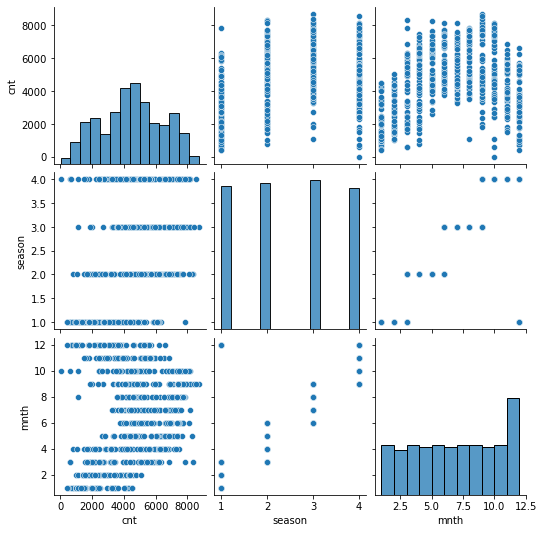

In [8]:
sns.pairplot(bike_sharing[['cnt', 'season', 'mnth']])

### Observation
* Season & month seems to have relationship

### Conclusion
* Let's keep seasons since model shall relative less number of features compared to month

In [134]:
bike_sharing.drop('mnth', axis=1, inplace=True)
bike_sharing.head()

,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


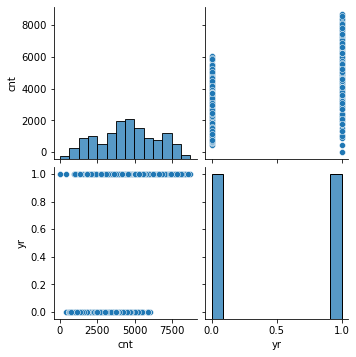

In [70]:
sns.pairplot(bike_sharing[['cnt', 'yr']])

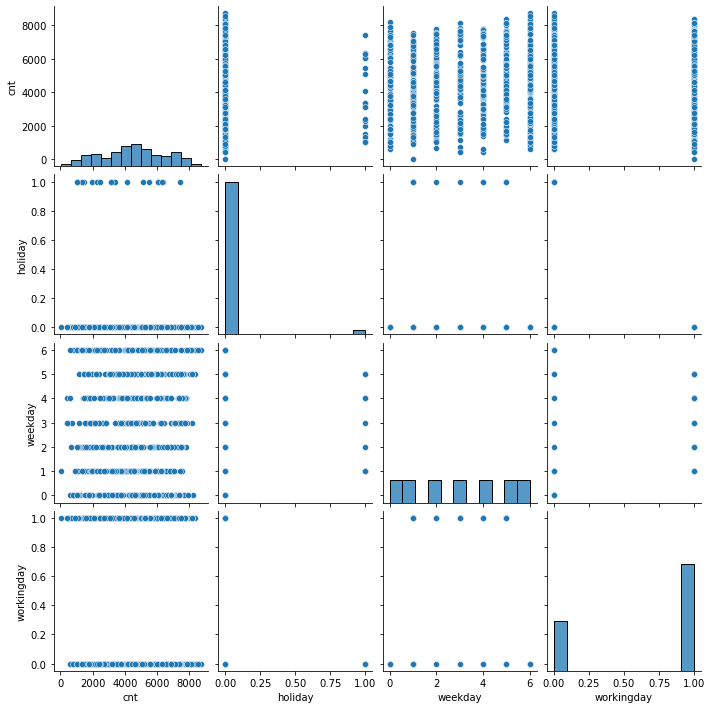

In [135]:
sns.pairplot(bike_sharing[['cnt', 'holiday', 'weekday', 'workingday']])

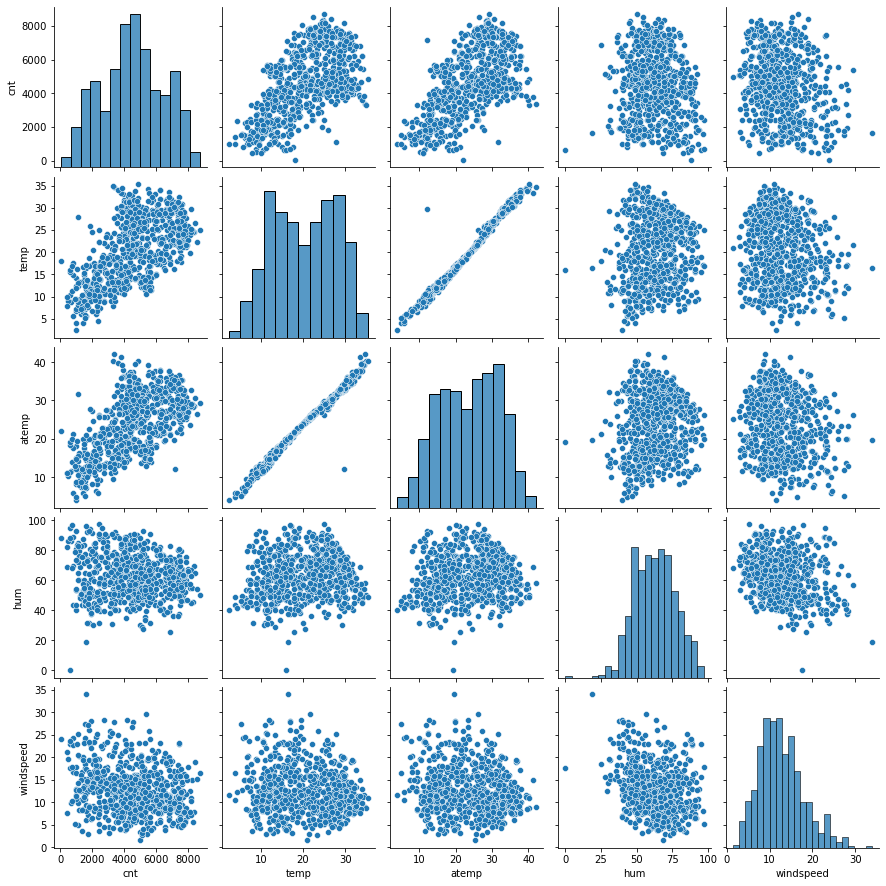

In [72]:
sns.pairplot(bike_sharing[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])

In [136]:
bike_sharing.head()

,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

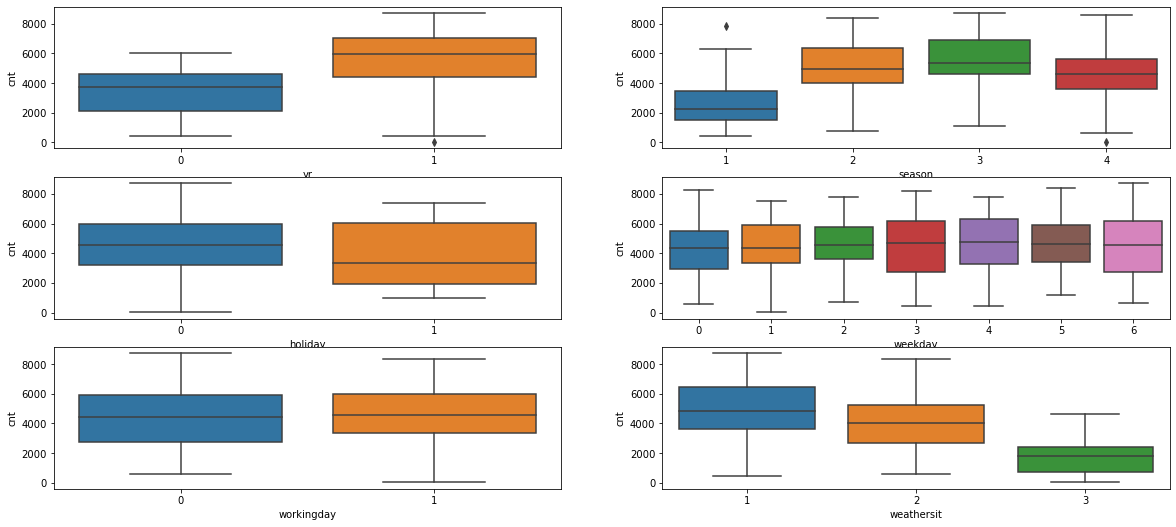

In [74]:
#let's use box-plot for understanding variation of cnt against Categorical variables 
# viz. season, yr, mnth, holiday, weekday, workingday, weathersit
plt.figure(figsize=(20, 12))

# create multiple sub-plots
plt.subplot(4, 2, 1)
sns.boxplot(x='yr', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 2)
sns.boxplot(x='season', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 3)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 4)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 5)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing)

plt.subplot(4, 2, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing)

In [137]:
# Assumption: Keep simple model so let's drop weekday feature and keep categorical variable workingday, holiday
bike_sharing.drop('weekday', axis=1, inplace=True)

In [138]:
bike_sharing.head()

,dteday,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [139]:
#let's drop dteday object since it is already explained by yr & mnth
bike_sharing.drop('dteday', axis=1, inplace=True)

In [140]:
bike_sharing.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Data Preparation

## Create Dummy Variables for Categorical variables:

### Handling of Categorical variable for mnth

In [141]:
# let's create dummy variable for season
season = pd.get_dummies(bike_sharing['season'], drop_first=True)
season.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [142]:
#let's concat month to bike_sharing_01
bike_sharing = pd.concat([bike_sharing, season], axis=1)
bike_sharing.head()

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3,4
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [143]:
#give readable name to dummay variable 
bike_sharing.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace = True)

In [144]:
#let's drop column 'mnth' from the dataframe
bike_sharing.drop('season', axis=1, inplace=True)

In [145]:
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


### Handling of Categorical variable 'weathersit'

In [146]:
# let's create dummy variable for weathersit
weathersit = pd.get_dummies(bike_sharing['weathersit'])
weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


### Conclusion: since data does not have any rows with value 4, let's avoid dropping the first

In [147]:
#let's concat weathersit to bike_sharing
bike_sharing = pd.concat([bike_sharing, weathersit], axis=1)
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,1,2,3
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [148]:
#give readable name to dummay variable related to weathersit
bike_sharing.rename(columns={1: 'Clear_weather', 2: 'Mist_Weather', 3:'Light_Snow_Weather'}, inplace = True)
bike_sharing.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


In [149]:
#let's drop column 'weathersit' from the dataframe
bike_sharing.drop('weathersit', axis=1, inplace=True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0


# Step 3: Splitting the Data into training & testing sets

In [150]:
#let's create split in a way where rows are consistent everytime
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size=0.7, test_size=0.3, random_state=100)

## Let's apply scaling to numerical variables to make them in same range

In [151]:
scaler = MinMaxScaler()

In [152]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1,0


<AxesSubplot:>

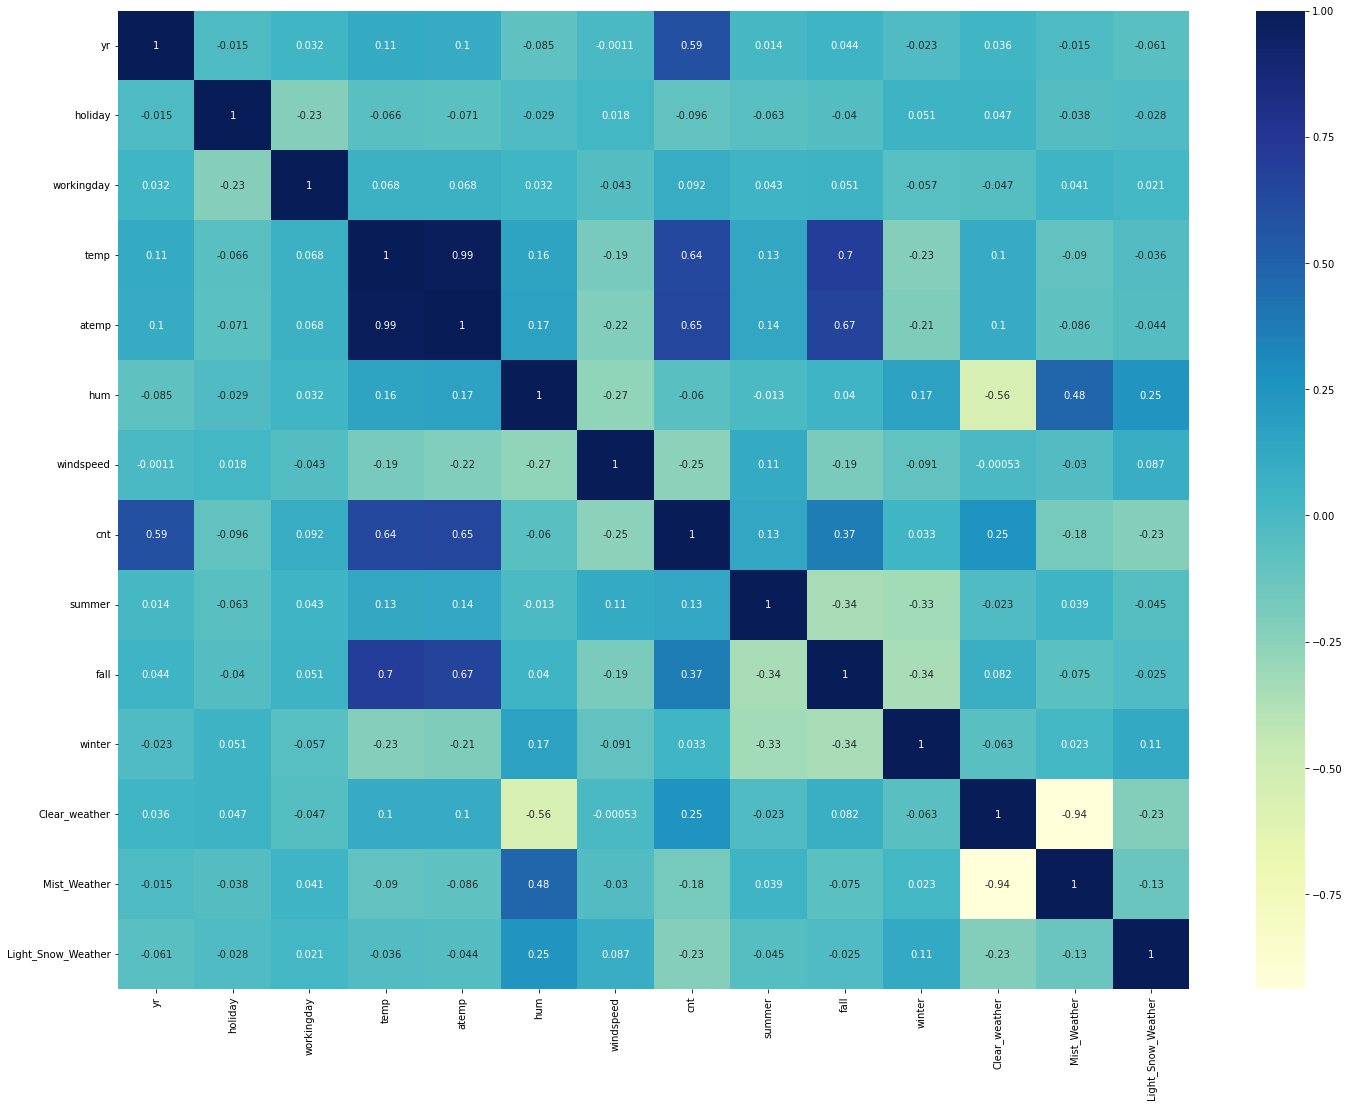

In [90]:
# let's check the correlation among features
plt.figure(figsize=(24, 18))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

# Step 4: Model Building

In [153]:
y_train = df_train.pop('cnt')

In [154]:
X_train_01 = df_train

## Model 01: Build with all features

In [159]:
X_train_sm_01 = sm.add_constant(X_train_01)

#create model
lr = sm.OLS(y_train, X_train_sm_01)

#fit the model
lr_model_01 = lr.fit()

# check the summary
lr_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.86e-181
Time:                        21:38:29   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0798      0.026      3.122      0.002       0.030       0.130
yr                     0.2303      0.008     27.174      0.000       0.214       0.247
holiday               -0.0746      0.027     -2.729      0.007      -0.128      -0.021
workingday             0.0175      0.009      1.902      0.058      -0.001       0.036
temp                   0.4645      0.141      3.306      0.001       0.188       0.741
atemp                  0.0321      0.144      0.224      0.823      -0.250       0.314
hum                   -0.1387      0.039     -3.541      0.000      -0.216      -0.062
windspeed             -0.1795      0.027     -6.556      0.000      -0.233      -0.126
summer                 0.1163      0.015      7.533      0.000       0.086       0.147
fall                   0.0749      0.021      3.593      0.000       0.034       0.116
winter                 0.1634      0.013     12.380      0.000       0.137       0.189
Clear_weather          0.1255      0.009     14.235      0.000       0.108       0.143
Mist_Weather           0.0711      0.012      6.028      0.000       0.048       0.094
Light_Snow_Weather    -0.1167      0.023     -5.109      0.000      -0.162      -0.072
==============================================================================
Omnibus:                       60.257   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.281
Skew:                          -0.577   Prob(JB):                     1.29e-36
Kurtosis:                       5.539   Cond. No.                     3.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [160]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_01.columns
vif['VIF'] = [variance_inflation_factor(X_train_01.values, i) for i in range(X_train_01.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,57.83
4,atemp,53.42
10,Clear_weather,29.72
11,Mist_Weather,22.63
8,fall,4.85
12,Light_Snow_Weather,3.45
7,summer,2.54
5,hum,1.87
9,winter,1.87
6,windspeed,1.24


## Observations
* atemp has high vif & high p-value

## Conclusion 
* drop temp and rebuild the model 

## Model 02: Rebuild the model after dropping 'temp'

In [157]:
X_train_02 = X_train_01.drop('atemp', axis=1)
X_train_02.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,1,0


In [161]:
X_train_sm_02 = sm.add_constant(X_train_02)

#create model
lr = sm.OLS(y_train, X_train_sm_02)

#fit the model
lr_model_02 = lr.fit()

# check the summary
lr_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.26e-182
Time:                        21:38:46   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0800      0.026      3.132      0.002       0.030       0.130
yr                     0.2303      0.008     27.200      0.000       0.214       0.247
holiday               -0.0748      0.027     -2.743      0.006      -0.128      -0.021
workingday             0.0175      0.009      1.902      0.058      -0.001       0.036
temp                   0.4950      0.035     14.328      0.000       0.427       0.563
hum                   -0.1382      0.039     -3.538      0.000      -0.215      -0.061
windspeed             -0.1807      0.027     -6.731      0.000      -0.233      -0.128
summer                 0.1163      0.015      7.545      0.000       0.086       0.147
fall                   0.0744      0.021      3.595      0.000       0.034       0.115
winter                 0.1636      0.013     12.426      0.000       0.138       0.189
Clear_weather          0.1257      0.009     14.357      0.000       0.109       0.143
Mist_Weather           0.0712      0.012      6.055      0.000       0.048       0.094
Light_Snow_Weather    -0.1169      0.023     -5.127      0.000      -0.162      -0.072
==============================================================================
Omnibus:                       59.653   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.952
Skew:                          -0.570   Prob(JB):                     2.50e-36
Kurtosis:                       5.533   Cond. No.                     2.97e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [162]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_02.columns
vif['VIF'] = [variance_inflation_factor(X_train_02.values, i) for i in range(X_train_02.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Clear_weather,29.63
10,Mist_Weather,22.60
7,fall,4.78
3,temp,3.50
11,Light_Snow_Weather,3.45
6,summer,2.54
4,hum,1.87
8,winter,1.87
5,windspeed,1.20
1,holiday,1.07


## Assumptions
* Workingday/holiday may have relationship


## Conclusion
* Let's drop Workingday/holiday and rebuild the model

# Model 03: Let's drop the Mist_Weather feature

In [97]:
X_train_03 = X_train_02.drop('holiday', axis=1)

In [164]:
X_train_sm_03 = sm.add_constant(X_train_03)
#create model
lr = sm.OLS(y_train, X_train_sm_03)

#fit the model
lr_model_03 = lr.fit()

# check the summary
lr_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.29e-182
Time:                        21:39:04   Log-Likelihood:                 484.18
No. Observations:                 510   AIC:                            -946.4
Df Residuals:                     499   BIC:                            -899.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0760      0.026      2.961      0.003       0.026       0.126
yr                     0.2304      0.009     27.037      0.000       0.214       0.247
workingday             0.0232      0.009      2.569      0.011       0.005       0.041
temp                   0.4962      0.035     14.271      0.000       0.428       0.565
hum                   -0.1393      0.039     -3.543      0.000      -0.217      -0.062
windspeed             -0.1814      0.027     -6.712      0.000      -0.234      -0.128
summer                 0.1181      0.016      7.612      0.000       0.088       0.149
fall                   0.0753      0.021      3.617      0.000       0.034       0.116
winter                 0.1635      0.013     12.337      0.000       0.137       0.190
Clear_weather          0.1231      0.009     14.053      0.000       0.106       0.140
Mist_Weather           0.0697      0.012      5.894      0.000       0.046       0.093
Light_Snow_Weather    -0.1168      0.023     -5.090      0.000      -0.162      -0.072
==============================================================================
Omnibus:                       65.144   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.849
Skew:                          -0.593   Prob(JB):                     1.80e-43
Kurtosis:                       5.803   Cond. No.                     3.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [165]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_03.columns
vif['VIF'] = [variance_inflation_factor(X_train_03.values, i) for i in range(X_train_03.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
8,Clear_weather,29.42
9,Mist_Weather,22.52
6,fall,4.78
2,temp,3.50
10,Light_Snow_Weather,3.45
5,summer,2.53
3,hum,1.87
7,winter,1.87
4,windspeed,1.20
0,yr,1.03


## Assumption: Clear_weather may have relationship with temp

## Trial: Let's drop Clear_weather and rebuild the model


# Model 04: Let's drop Clear_weather and rebuild model

In [166]:
X_train_04 = X_train_03.drop('Clear_weather', axis=1)

In [167]:
X_train_sm_04 = sm.add_constant(X_train_04)

#create model
lr = sm.OLS(y_train, X_train_sm_04)

#fit the model
lr_model_04 = lr.fit()

# check the summary
lr_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.29e-182
Time:                        21:39:23   Log-Likelihood:                 484.18
No. Observations:                 510   AIC:                            -946.4
Df Residuals:                     499   BIC:                            -899.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1991      0.029      6.937      0.000       0.143       0.256
yr                     0.2304      0.009     27.037      0.000       0.214       0.247
workingday             0.0232      0.009      2.569      0.011       0.005       0.041
temp                   0.4962      0.035     14.271      0.000       0.428       0.565
hum                   -0.1393      0.039     -3.543      0.000      -0.217      -0.062
windspeed             -0.1814      0.027     -6.712      0.000      -0.234      -0.128
summer                 0.1181      0.016      7.612      0.000       0.088       0.149
fall                   0.0753      0.021      3.617      0.000       0.034       0.116
winter                 0.1635      0.013     12.337      0.000       0.137       0.190
Mist_Weather          -0.0534      0.011     -4.845      0.000      -0.075      -0.032
Light_Snow_Weather    -0.2400      0.028     -8.684      0.000      -0.294      -0.186
==============================================================================
Omnibus:                       65.144   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.849
Skew:                          -0.593   Prob(JB):                     1.80e-43
Kurtosis:                       5.803   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_04.columns
vif['VIF'] = [variance_inflation_factor(X_train_04.values, i) for i in range(X_train_04.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,22.74
3,hum,15.86
6,fall,6.47
4,windspeed,3.66
5,summer,3.35
1,workingday,2.99
7,winter,2.49
8,Mist_Weather,2.12
0,yr,2.03
9,Light_Snow_Weather,1.17


### Assumption
* temp and humidity may have relationship

### Trial
* Let's drop temp/humidity and rebuild the model



# Model 05: Rebuild the model after dropping atemp

In [169]:
X_train_05 = X_train_04.drop('hum', axis=1)

In [170]:
X_train_sm_05 = sm.add_constant(X_train_05)

#create model
lr = sm.OLS(y_train, X_train_sm_05)

#fit the model
lr_model_05 = lr.fit()

# check the summary
lr_model_05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.63e-181
Time:                        21:39:43   Log-Likelihood:                 477.84
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     500   BIC:                            -893.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1207      0.018      6.528      0.000       0.084       0.157
yr                     0.2337      0.009     27.281      0.000       0.217       0.251
workingday             0.0236      0.009      2.585      0.010       0.006       0.042
temp                   0.4667      0.034     13.668      0.000       0.400       0.534
windspeed             -0.1532      0.026     -5.865      0.000      -0.205      -0.102
summer                 0.1208      0.016      7.711      0.000       0.090       0.152
fall                   0.0831      0.021      3.967      0.000       0.042       0.124
winter                 0.1589      0.013     11.910      0.000       0.133       0.185
Mist_Weather          -0.0761      0.009     -8.381      0.000      -0.094      -0.058
Light_Snow_Weather    -0.2786      0.026    -10.844      0.000      -0.329      -0.228
==============================================================================
Omnibus:                       63.012   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.863
Skew:                          -0.582   Prob(JB):                     7.20e-41
Kurtosis:                       5.710   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_05.columns
vif['VIF'] = [variance_inflation_factor(X_train_05.values, i) for i in range(X_train_05.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,15.03
5,fall,6.16
3,windspeed,3.35
4,summer,3.31
1,workingday,2.82
6,winter,2.39
0,yr,2.03
7,Mist_Weather,1.49
8,Light_Snow_Weather,1.08


## Observations
* Mist_Weather may have relationship with other independent features

## Conclusion
* Let's rebuild model with/without Mist_Weather

# Model 06: Let's rebuild the model after dropping temp_to_atemp feature

In [172]:
X_train_06 = X_train_05.drop('Mist_Weather', axis=1)

In [173]:
X_train_sm_06 = sm.add_constant(X_train_06)

#create model
lr = sm.OLS(y_train, X_train_sm_06)

#fit the model
lr_model_06 = lr.fit()

# check the summary
lr_model_06.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.00e-167
Time:                        21:40:03   Log-Likelihood:                 444.32
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     501   BIC:                            -832.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0849      0.019      4.423      0.000       0.047       0.123
yr                     0.2346      0.009     25.665      0.000       0.217       0.253
workingday             0.0199      0.010      2.044      0.042       0.001       0.039
temp                   0.4916      0.036     13.547      0.000       0.420       0.563
windspeed             -0.1453      0.028     -5.219      0.000      -0.200      -0.091
summer                 0.1123      0.017      6.734      0.000       0.080       0.145
fall                   0.0768      0.022      3.440      0.001       0.033       0.121
winter                 0.1538      0.014     10.821      0.000       0.126       0.182
Light_Snow_Weather    -0.2507      0.027     -9.225      0.000      -0.304      -0.197
==============================================================================
Omnibus:                       60.466   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.561
Skew:                          -0.656   Prob(JB):                     2.70e-29
Kurtosis:                       5.115   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_06.columns
vif['VIF'] = [variance_inflation_factor(X_train_06.values, i) for i in range(X_train_06.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,14.99
5,fall,6.15
4,summer,3.31
3,windspeed,3.30
1,workingday,2.77
6,winter,2.37
0,yr,2.03
7,Light_Snow_Weather,1.06


## Observations
*  temp may have relationship with other independent features

## Conclusion
* Let's rebuild the model after dropping temp

In [175]:
X_train_07 = X_train_06.drop('temp', axis=1)

In [176]:
X_train_sm_07 = sm.add_constant(X_train_07)

#create model
lr = sm.OLS(y_train, X_train_sm_07)

#fit the model
lr_model_07 = lr.fit()

# check the summary
lr_model_07.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     186.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.78e-135
Time:                        21:40:21   Log-Likelihood:                 364.73
No. Observations:                 510   AIC:                            -713.5
Df Residuals:                     502   BIC:                            -679.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2307      0.019     12.426      0.000       0.194       0.267
yr                     0.2483      0.011     23.415      0.000       0.228       0.269
workingday             0.0216      0.011      1.907      0.057      -0.001       0.044
windspeed             -0.1661      0.032     -5.115      0.000      -0.230      -0.102
summer                 0.2542      0.015     16.767      0.000       0.224       0.284
fall                   0.3217      0.015     20.998      0.000       0.292       0.352
winter                 0.2260      0.015     14.683      0.000       0.196       0.256
Light_Snow_Weather    -0.2592      0.032     -8.169      0.000      -0.322      -0.197
==============================================================================
Omnibus:                       28.537   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.496
Skew:                          -0.361   Prob(JB):                     3.99e-12
Kurtosis:                       4.396   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
# let's check the collinearity using VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_07.columns
vif['VIF'] = [variance_inflation_factor(X_train_07.values, i) for i in range(X_train_07.shape[1])]
vif['VIF'] = round (vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,2.77
1,workingday,2.59
0,yr,1.92
3,summer,1.68
4,fall,1.60
5,winter,1.54
6,Light_Snow_Weather,1.06


# Step 5: Residual Analysis of the training data

In [179]:
#make prediction
y_train_pred = lr_model_06.predict(X_train_sm_06)

In [180]:
#let's compute residual
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

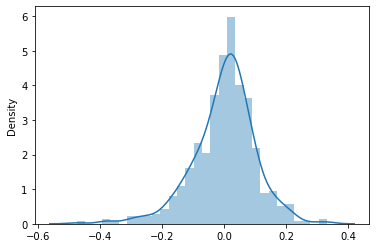

In [181]:
sns.distplot(res)

# Step 6: Prediction and evluation on the test set

In [182]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear_weather,Mist_Weather,Light_Snow_Weather
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,1,0,0


In [183]:
y_test = df_test.pop('cnt')

In [184]:
X_test = df_test

In [185]:
X_test_sm = sm.add_constant(X_test)

In [186]:
X_test_sm = X_test_sm.drop(['atemp', 'holiday', 'Clear_weather', 'hum', 'Mist_Weather'], axis=1)

In [189]:
y_test_pred = lr_model_06.predict(X_test_sm)

In [190]:
r2_score(y_test, y_test_pred)

0.7776495089558222

# Step 7: Model Evaluation

Text(0, 0.5, 'y_test_pred')

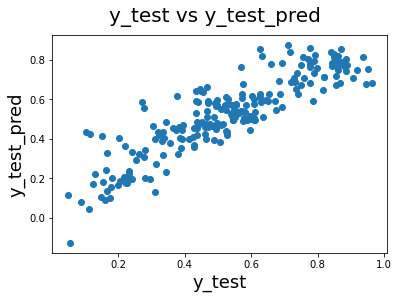

In [191]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=18)